In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd 

countriesAndTerritories = "countriesAndTerritories"
dateRep = "dateRep"
deaths = "deaths"
cases = "cases"
df = pd.read_excel("datasources/covid/COVID-19-geographic-disbtribution-worldwide-2020-04-28.xlsx")
df = df.set_index([dateRep, countriesAndTerritories])
df = df.sort_values(by = dateRep, axis = 'index')
df['deathcumsum'] = df.groupby(level=-1)[deaths].cumsum()
df['casescumsum'] = df.groupby(level=-1)[cases].cumsum()
df["mortality"] = df["deathcumsum"] / df["casescumsum"]


# cases = df.groupby(countriesAndTerritoriescountriesAndTerritories).agg({"Deaths" : "sum", "Cases" : "sum"})
# cases["mortality"] = round(cases["Deaths"] / cases["Cases"] * 100, 2)
# cases.sort_values("Cases", inplace = True, ascending = False)
# cases["country"] = cases.index
# print(cases)

# fig = px.scatter(cases, x="Cases", y="Deaths", color="country", log_x = True, log_y = True)
#         # , marginal_y="violin", marginal_x="box", trendline="ols")
# fig.show()

df = df.reset_index()
print(df)

         dateRep   countriesAndTerritories  day  month  year  cases  deaths  \
0     2019-12-31        Dominican_Republic   31     12  2019      0       0   
1     2019-12-31                     Nepal   31     12  2019      0       0   
2     2019-12-31                    Sweden   31     12  2019      0       0   
3     2019-12-31                    Monaco   31     12  2019      0       0   
4     2019-12-31                   Armenia   31     12  2019      0       0   
...          ...                       ...  ...    ...   ...    ...     ...   
13618 2020-04-28  Turks_and_Caicos_islands   28      4  2020      1       0   
13619 2020-04-28                      Mali   28      4  2020     19       0   
13620 2020-04-28             Faroe_Islands   28      4  2020      0       0   
13621 2020-04-28              Burkina_Faso   28      4  2020      3       0   
13622 2020-04-28               Afghanistan   28      4  2020    172       0   

      geoId countryterritoryCode  popData2018 conti

         dateRep   countriesAndTerritories  day  month  year  cases  deaths  \
0     2019-12-31        Dominican_Republic   31     12  2019      0       0   
1     2019-12-31                     Nepal   31     12  2019      0       0   
2     2019-12-31                    Sweden   31     12  2019      0       0   
3     2019-12-31                    Monaco   31     12  2019      0       0   
4     2019-12-31                   Armenia   31     12  2019      0       0   
...          ...                       ...  ...    ...   ...    ...     ...   
13618 2020-04-28  Turks_and_Caicos_islands   28      4  2020      1       0   
13619 2020-04-28                      Mali   28      4  2020     19       0   
13620 2020-04-28             Faroe_Islands   28      4  2020      0       0   
13621 2020-04-28              Burkina_Faso   28      4  2020      3       0   
13622 2020-04-28               Afghanistan   28      4  2020    172       0   

      geoId countryterritoryCode  popData2018 conti

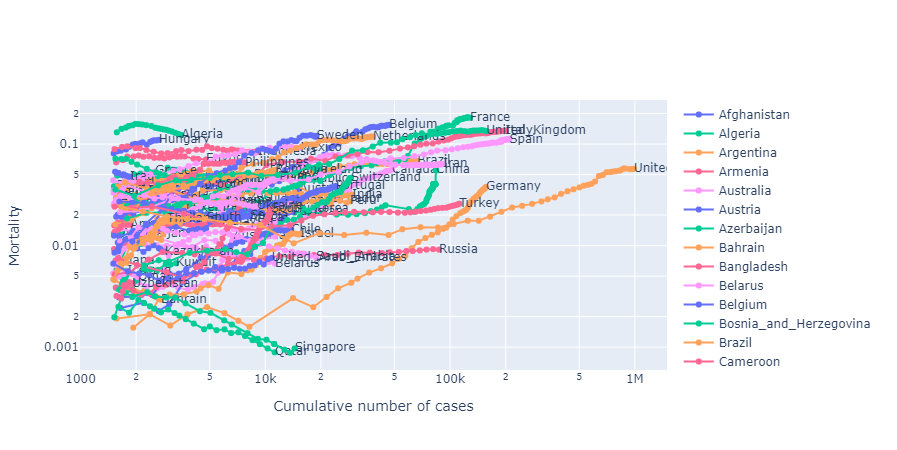

In [3]:
import plotly.graph_objects as go
import plotly.express as px

fig = go.Figure()

grouped = df[df["casescumsum"] > 1500].groupby("countriesAndTerritories")
print(df)

for name, group in grouped:
    pointCount = len(group["mortality"].index)
    group = group.reset_index()
    fig.add_trace(go.Scatter(
            x = group["casescumsum"], 
            y = group["mortality"], 
            mode = 'lines+markers',
            name = name,
            text = [ (f'{name} - {group[dateRep].at[i].date()}<br>New cases: {group[cases].at[i]}<br>New deaths: {group[deaths].at[i]}') for i in range(pointCount)  ],
            textposition="middle right"
            )
        )
    groupTail = group.tail(1)
    fig.add_trace(go.Scatter(
            x = groupTail["casescumsum"], 
            y = groupTail["mortality"], 
            mode = 'text',
            name = name,
            text = name,
            textposition="middle right",
            showlegend = False
            )
        )

# fig = px.line(df[df["casescumsum"] > 1000], 
#               x="casescumsum", 
#               y="mortality", 
#               color=countriesAndTerritories, 
#               line_group=countriesAndTerritories, 
#               hover_name=countriesAndTerritories,
# #               text=countriesAndTerritories,
#               log_x = True,
#               log_y = True
#         ) #line_shape="spline") #, render_mode="svg")

fig.update_xaxes(title_text='Cumulative number of cases')
fig.update_yaxes(title_text='Mortality')
fig.update_layout(xaxis_type="log", yaxis_type="log")
# fig.write_image("fig1.html")
fig.show()

In [4]:
with open("docs/index.html", "w") as f:
    f.write(fig.to_html())

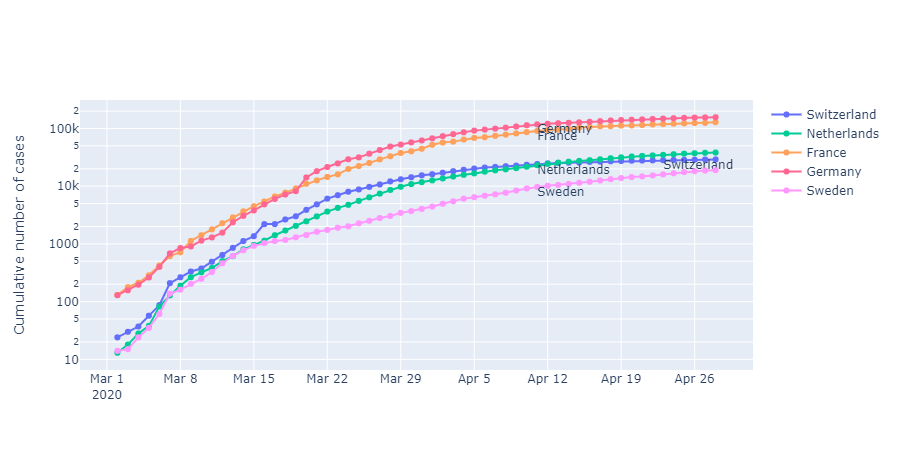

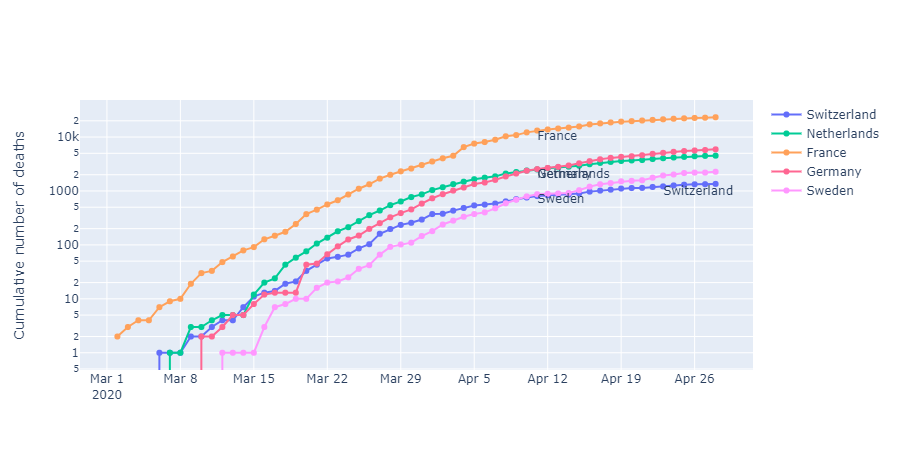

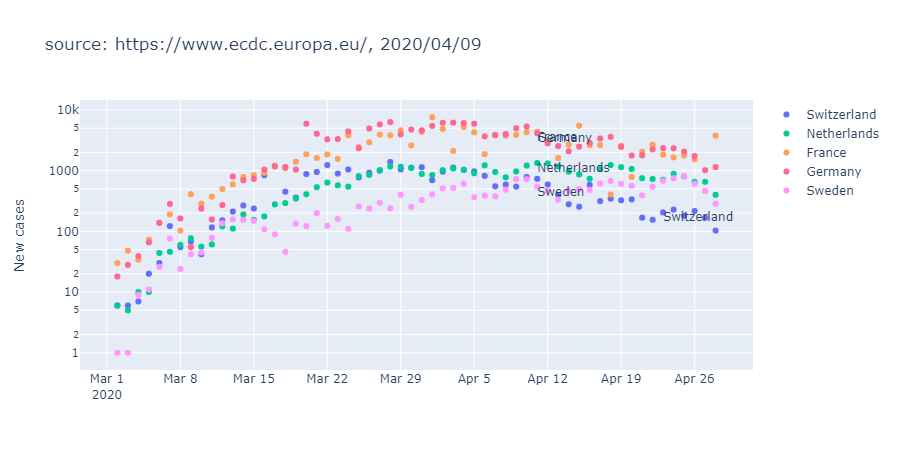

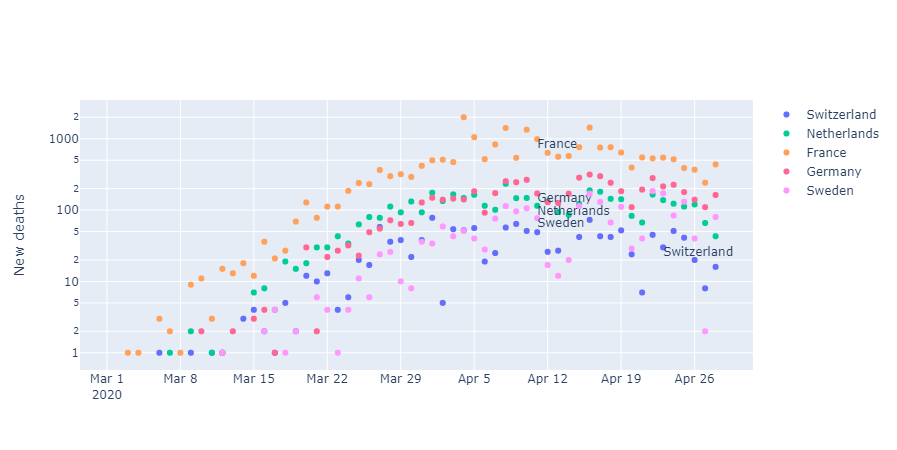

In [4]:
from plotly.subplots import make_subplots

# Create figure with secondary y-axis
yTags = ["casescumsum", "deathcumsum", cases, deaths]
yMarkers = ['lines+markers', 'lines+markers', 'markers', 'markers']
yTitles = ['Cumulative number of cases', 'Cumulative number of deaths', 'New cases', 'New deaths']
figs = [make_subplots() for i in range(len(yTags))]

grouped = df[df["dateRep"] > "2020-03-01"].groupby(countriesAndTerritories)

xTag = dateRep


for i in range(len(yTags)):
    for name, labelLoc, labelPos in (
        ("Switzerland", 0.9, "bottom right"), 
        ("Netherlands", 0.7, "bottom right"), 
        ("France", 0.7, "bottom right"), 
#         ("Burkina_Faso", 0.6, "bottom right"), 
#         ("Mali", 0.9, "bottom right"), 
#         ("Ghana", 0.9, "bottom right"), 
    #     ("China", 0.2, "top left"),
        ("Germany", 0.7, "bottom right"),
        ("Sweden", 0.7, "bottom right"),
    ):
        group = grouped.get_group(name).reset_index()
        pointCount = len(group["mortality"].index)
        group = group.reset_index()
        figs[i].add_trace(go.Scatter(
                x = group[xTag], 
                y = group[yTags[i]], 
                mode = yMarkers[i],
                name = name,
                text = [ (f'{name} - {group[dateRep].at[i].date()}<br>New cases: {group[cases].at[i]}<br>New deaths: {group[deaths].at[i]}') for i in range(pointCount)  ],
                textposition=labelPos
                )
            )
        tailPoint = int(pointCount * labelLoc)
        groupTail = group.iloc[tailPoint : tailPoint + 1]

        figs[i].add_trace(go.Scatter(
                x = groupTail[xTag], 
                y = groupTail[yTags[i]], 
                mode = 'text',
                name = name,
                text = name,
                textposition=labelPos,
                showlegend = False
                )
            )



# fig = px.line(df[df["casescumsum"] > 1000], 
#               x="casescumsum", 
#               y="mortality", 
#               color=countriesAndTerritories, 
#               line_group=countriesAndTerritories, 
#               hover_name=countriesAndTerritories,
# #               text=countriesAndTerritories,
#               log_x = True,
#               log_y = True
#         ) #line_shape="spline") #, render_mode="svg")

for i in range(len(yTags)):
    figs[i].update_yaxes(title_text = yTitles[i])
    figs[i].update_layout(yaxis_type="log")
    
    if yTags[i] == "cases":
        figs[i].update_layout({"title" : "source: https://www.ecdc.europa.eu/, 2020/04/09"})

    # fig.write_image("fig1.html")
    figs[i].show()
